<a href="https://colab.research.google.com/github/Sanjay13072005/Inertnship-task/blob/main/task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Available years: 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
Enter a year from the available years: 1967
Available countries:
Aruba
Africa Eastern and Southern
Afghanistan
Africa Western and Central
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo, Dem. Rep.
Co

<ipython-input-1-21f17d1c8b04>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered, x="Country Name", y=f"Population in {year}", palette="viridis")


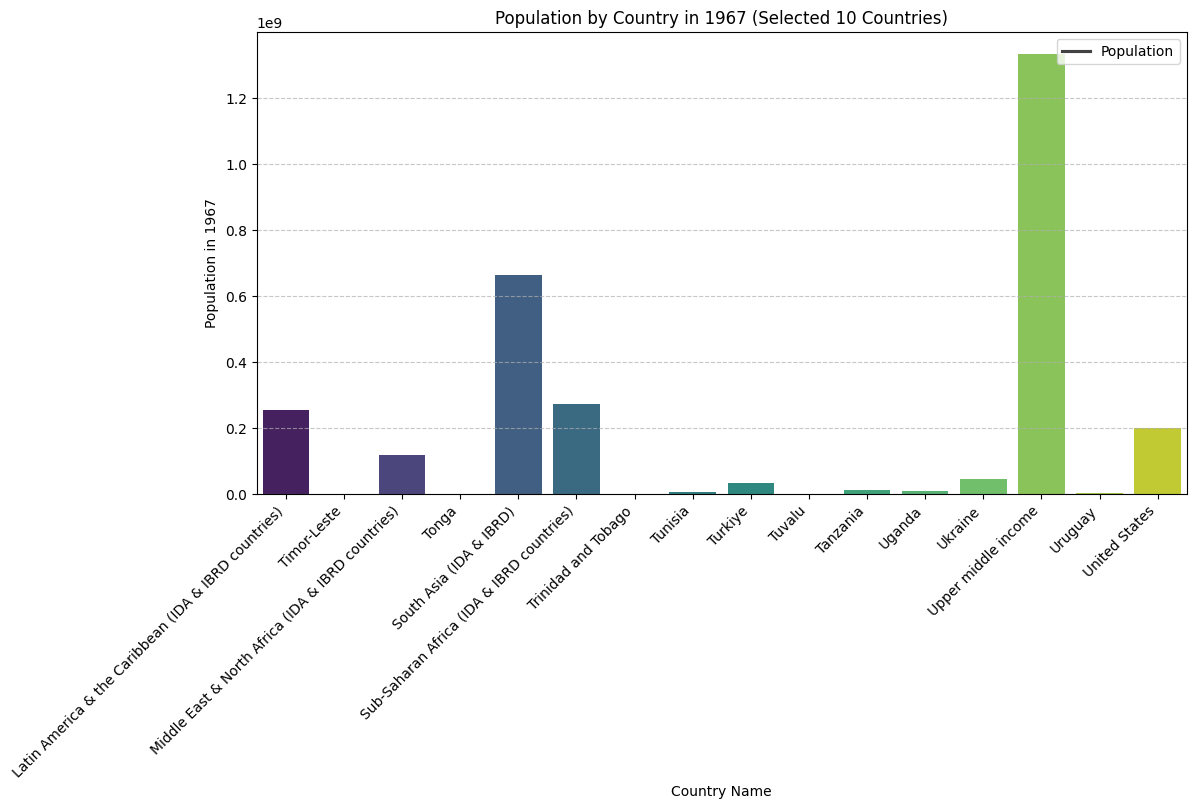


Randomly Selected Population Data:
       Country Name  Population in 1967
19    Burkina Faso           5326348.0
30        Barbados            247091.0
45        Colombia          19235618.0
75         Finland           4605744.0
104      IDA total         473724445.0
170  North America         219173514.0
229           Chad           3508512.0
245         Tuvalu              5652.0
248        Ukraine          46215988.0
258        Vanuatu             78921.0


<ipython-input-1-21f17d1c8b04>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=random_filtered, x="Country Name", y=f"Population in {year}", palette="coolwarm")


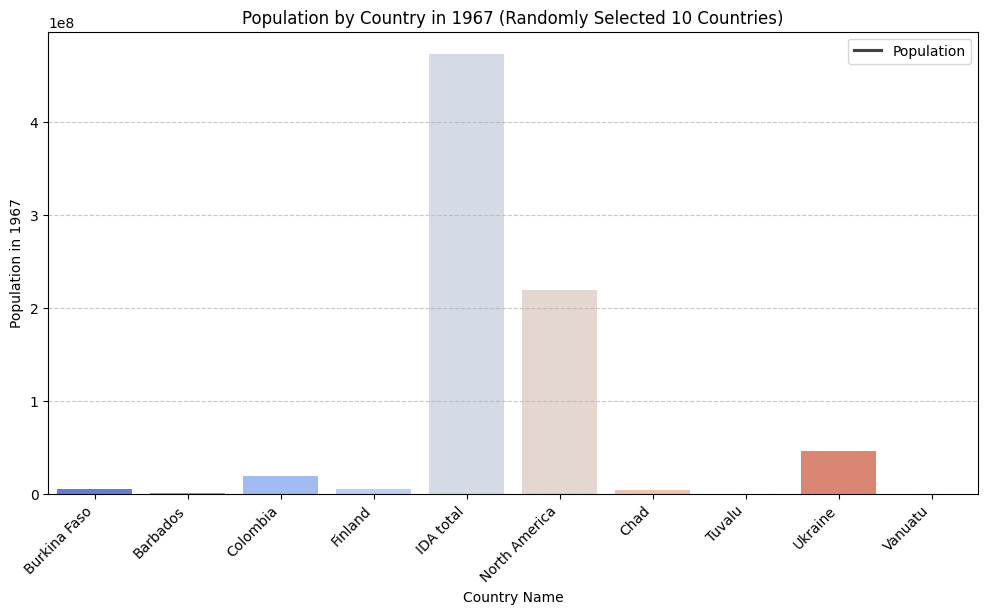

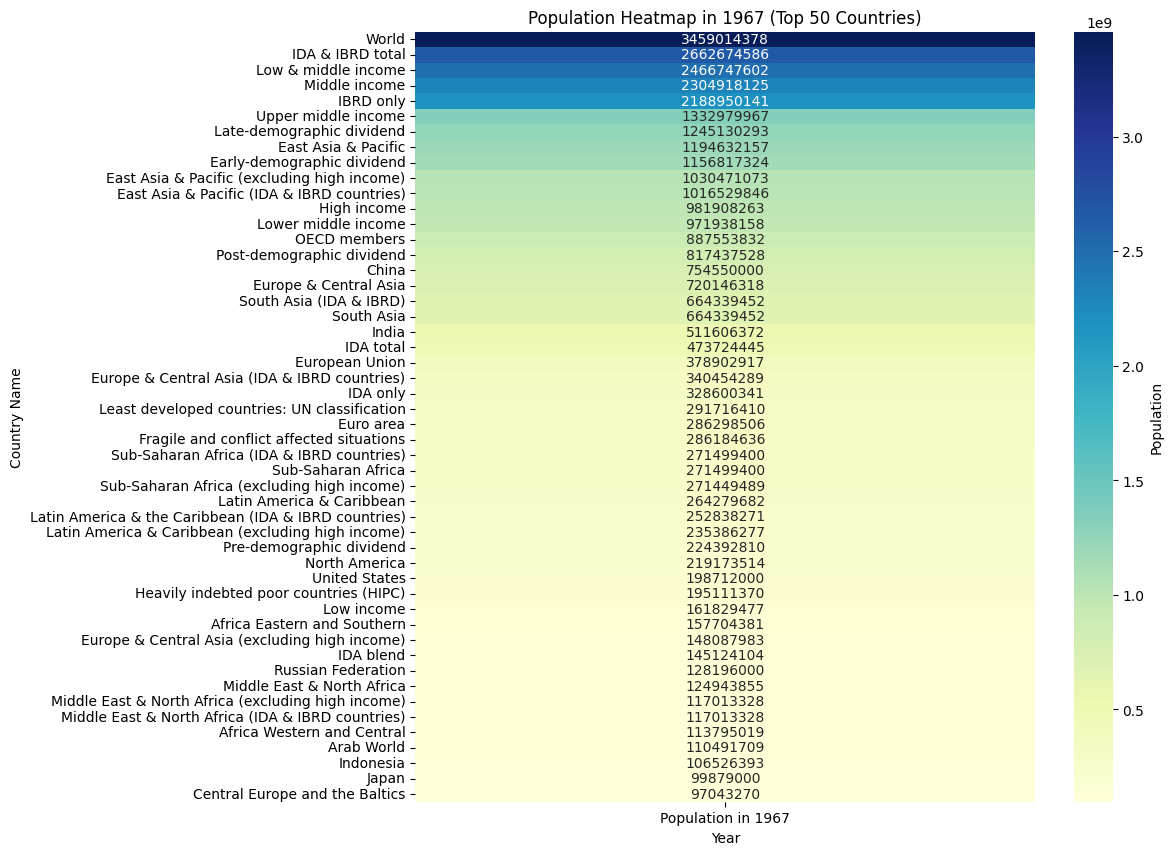

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/internship projects/API_SP.POP.TOTL_DS2_en_csv_v2_900.csv', skiprows=4)

# Get available years and user input
available_years = [col for col in data.columns if col.isdigit()]
print(f"Available years: {', '.join(available_years)}")
year = input("Enter a year from the available years: ")
if year not in available_years:
    print("Invalid year.")
    exit()

# Get countries and filter data
print("Available countries:", *data["Country Name"].to_list(), sep="\n")
countries = [c.strip() for c in input("Enter at least 10 countries (comma-separated): ").split(',')]

# If fewer than 10 countries are provided, prompt or select randomly
if len(countries) < 10:
    print(f"You must enter at least 10 countries. Randomly selecting 10 countries.")
    countries = random.sample(data["Country Name"].dropna().to_list(), 10)

filtered = data[data["Country Name"].isin(countries)]
if filtered.empty:
    print("No data available.")
    exit()

# Display results
filtered = filtered[["Country Name", year]].rename(columns={year: f"Population in {year}"})
print("\nPopulation Data:\n", filtered)

# Visualization for selected 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x="Country Name", y=f"Population in {year}", palette="viridis")
plt.title(f"Population by Country in {year} (Selected 10 Countries)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(labels=["Population"], loc="upper right", frameon=True)
plt.show()

# Randomly select 10 countries and visualize
random_countries = random.sample(data["Country Name"].dropna().to_list(), 10)
random_filtered = data[data["Country Name"].isin(random_countries)][["Country Name", year]].rename(columns={year: f"Population in {year}"})
print("\nRandomly Selected Population Data:\n", random_filtered)

plt.figure(figsize=(12, 6))
sns.barplot(data=random_filtered, x="Country Name", y=f"Population in {year}", palette="coolwarm")
plt.title(f"Population by Country in {year} (Randomly Selected 10 Countries)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(labels=["Population"], loc="upper right", frameon=True)
plt.show()

# Heatmap for all countries
all_countries_filtered = data[["Country Name", year]].rename(columns={year: f"Population in {year}"})
all_countries_filtered = all_countries_filtered.sort_values(by=f"Population in {year}", ascending=False).head(50)  # Top 50 countries by population
heatmap_data = all_countries_filtered.set_index("Country Name")

plt.figure(figsize=(10, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",  # Color map
    cbar_kws={'label': 'Population'}  # Add a label for the color bar
)
plt.title(f"Population Heatmap in {year} (Top 50 Countries)")
plt.xlabel("Year")
plt.ylabel("Country Name")
plt.show()
